# 第6章 词向量推理（word2vec）

### 以往研究

在前几章中，我们忽略了词附近的上下文信息，包括每个词周围的其他词、相邻词对该词词义的影响，以及词之间的关系对句子整体语义的影响。词袋模型是将文档中所有词混在一起进行统计。在本章中，我们将从少量词的邻域中创建更小的词袋，一般会少于10个词条，同时确保这些邻域的语义不会溢出到相邻的句子中。这个过程有助于集中在相关词上进行词向量训练。

### 词向量的 ‘魅力’

这个新的词向量将能够识别同义词、反义词或同类别的词，如人、动物、地点、植物、名字或概念等。我们在第4章中用潜在语义分析做过类似的事情，但是对词邻域的严格限制也直接影响了词向量的精确率，词、n-gram 和文档的潜在语义分析并没有捕捉到词的所有字面含义，更不用说隐含或隐藏含义了。

Word2vec 这样的词嵌入模型不仅对英文词有用，对于任何具有语义的符号序列，只要符号的序列和邻近性能够表示其意义，词嵌入都能发挥作用。比如象形语言，凯撒密码等。

### 一个例子

如果你想要搜索：

Who is to nuclear physics what Louis Pasteur is to germs?

(谁对核物理的贡献就像路易斯·巴斯德对细菌的贡献一样?)

对于这种问题，Google、Bing 甚至 DuckDuckGo 都爱莫能助2。但是有了词向量，解决方法就会很简单，只需要从“Louis Pasteur”中去除“germs”，然后加上“physics”:

In [148]:
answer_vector = wv['Louis_Pasteur'] - wv['germs'] + wv['physics'] 

KeyError: "Key 'Louis_Pasteur' not present"

如果大家对那些不相关领域中人物之间的更复杂的类比感兴趣，如音乐家和科学家，那么也
可以这样做:
Who is the Marie Curie of music?
 (谁是音乐界的玛丽·居里?)

In [149]:
 wv['Marie_Curie'] - wv['science'] + wv['music']

array([-0.19970703, -0.28515625, -0.18237305,  0.34838867,  0.11242676,
        0.16137695, -0.1459961 , -0.28222656, -0.0390625 , -0.3491211 ,
       -0.2520752 ,  0.03710938,  0.21533203, -0.3027954 ,  0.5428467 ,
        0.00976562,  0.18017578,  0.30273438,  0.03491211,  0.16113281,
       -0.10113525,  0.29223633,  0.2319336 ,  0.19042969, -0.23730469,
        0.1887207 , -0.2709961 , -0.23779297,  0.3257141 ,  0.14512873,
       -0.21118164, -0.1640625 , -0.12597656, -0.06079102, -0.20263672,
       -0.33496094, -0.07214355, -0.28735352, -0.10302734,  0.0080719 ,
        0.03735352,  0.09814453, -0.08349609, -0.1821289 ,  0.07250977,
       -0.23071289, -0.36584473, -0.23486328, -0.11508942,  0.08300781,
        0.0435791 , -0.12481689,  0.0690918 ,  0.37841797, -0.1821289 ,
       -0.36328125, -0.5534668 ,  0.3477173 , -0.36816406, -0.24267578,
        0.1340332 ,  0.0521698 ,  0.01367188,  0.24951172,  0.25354004,
        0.125     , -0.48291016,  0.04882812,  0.2626953 ,  0.07

### 6.2 词向量

2012 年，微软实习生 Thomas Mikolov发现了一种用一定维度的向量表示词的含义的方法。
Mikolov 训练了一个神经网络3来预测每个目标词附近的共现词。2013 年，Mikolov 和他的队友在谷歌发布了创建这些词向量的软件，称为 Word2vec。

### 6.2.1 面对向量的推理

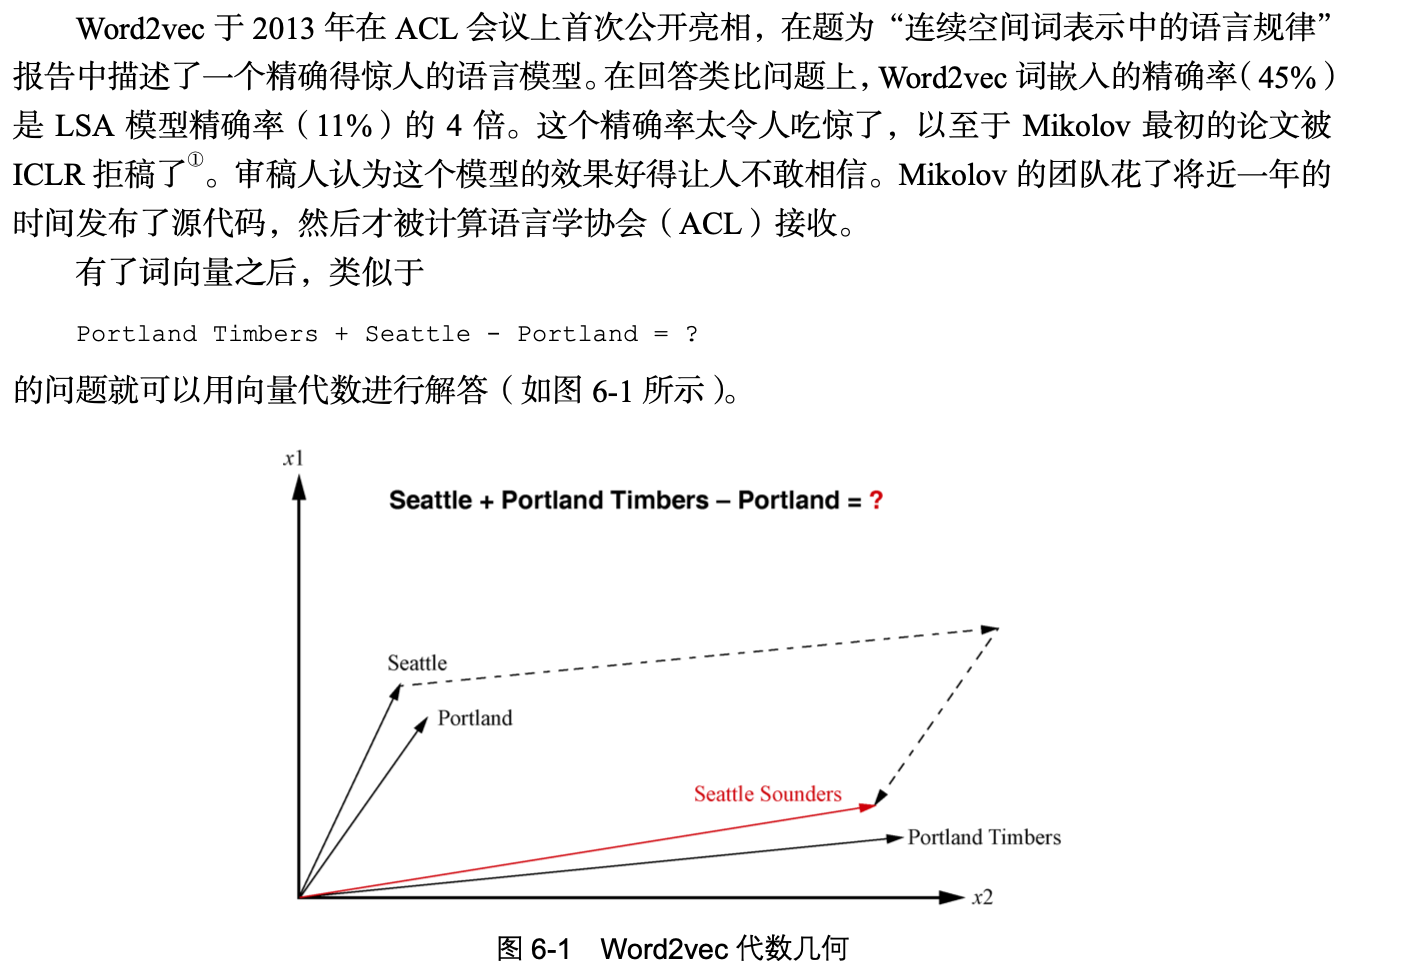

词向量表示法不但对推理和类比问题有用，而且对其他所有使用自然语言向量空间模型处理的问题都有用。

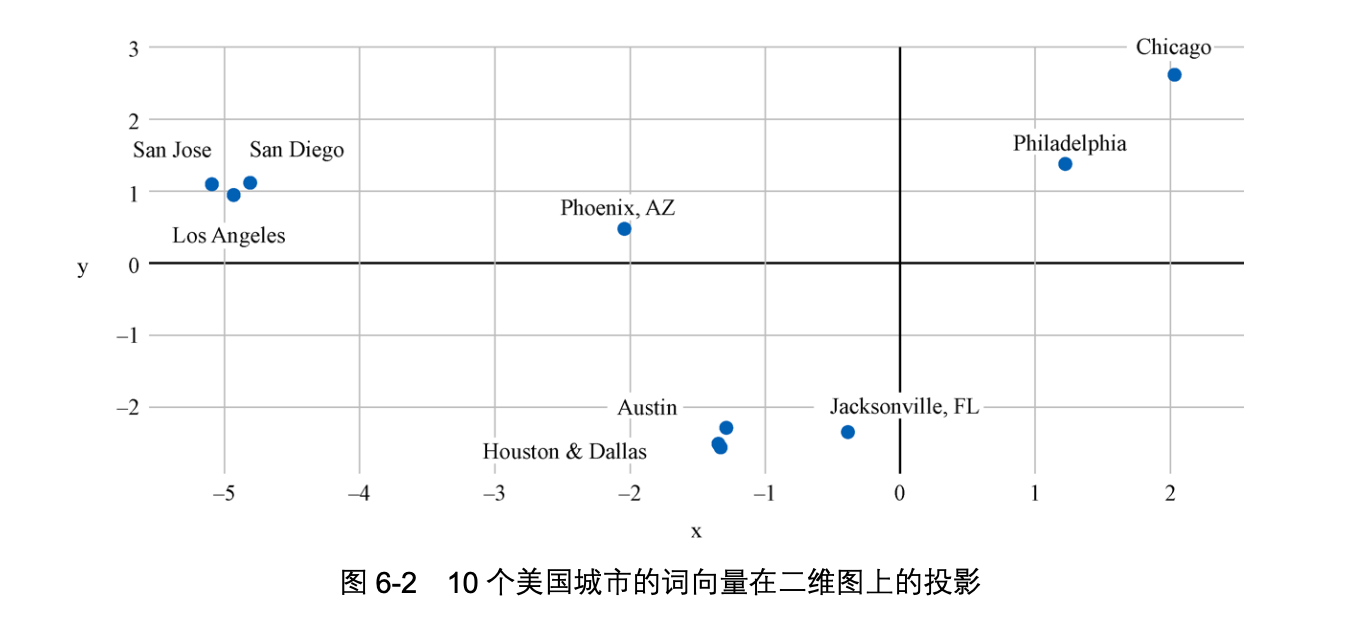

In [150]:
sentence = "Claude Monet painted the Grand Canal of Venice in 1806."

训练 Word2vec 嵌入有两种方法:

􏰀 skip-gram 方法，基于目标词(输入词)预测上下文(输出词);

􏰀 连续词袋(continuous bag-of-words，CBOW)方法，基于邻近词(输入词)预测目标词
(输出词)。

### Skip-gram

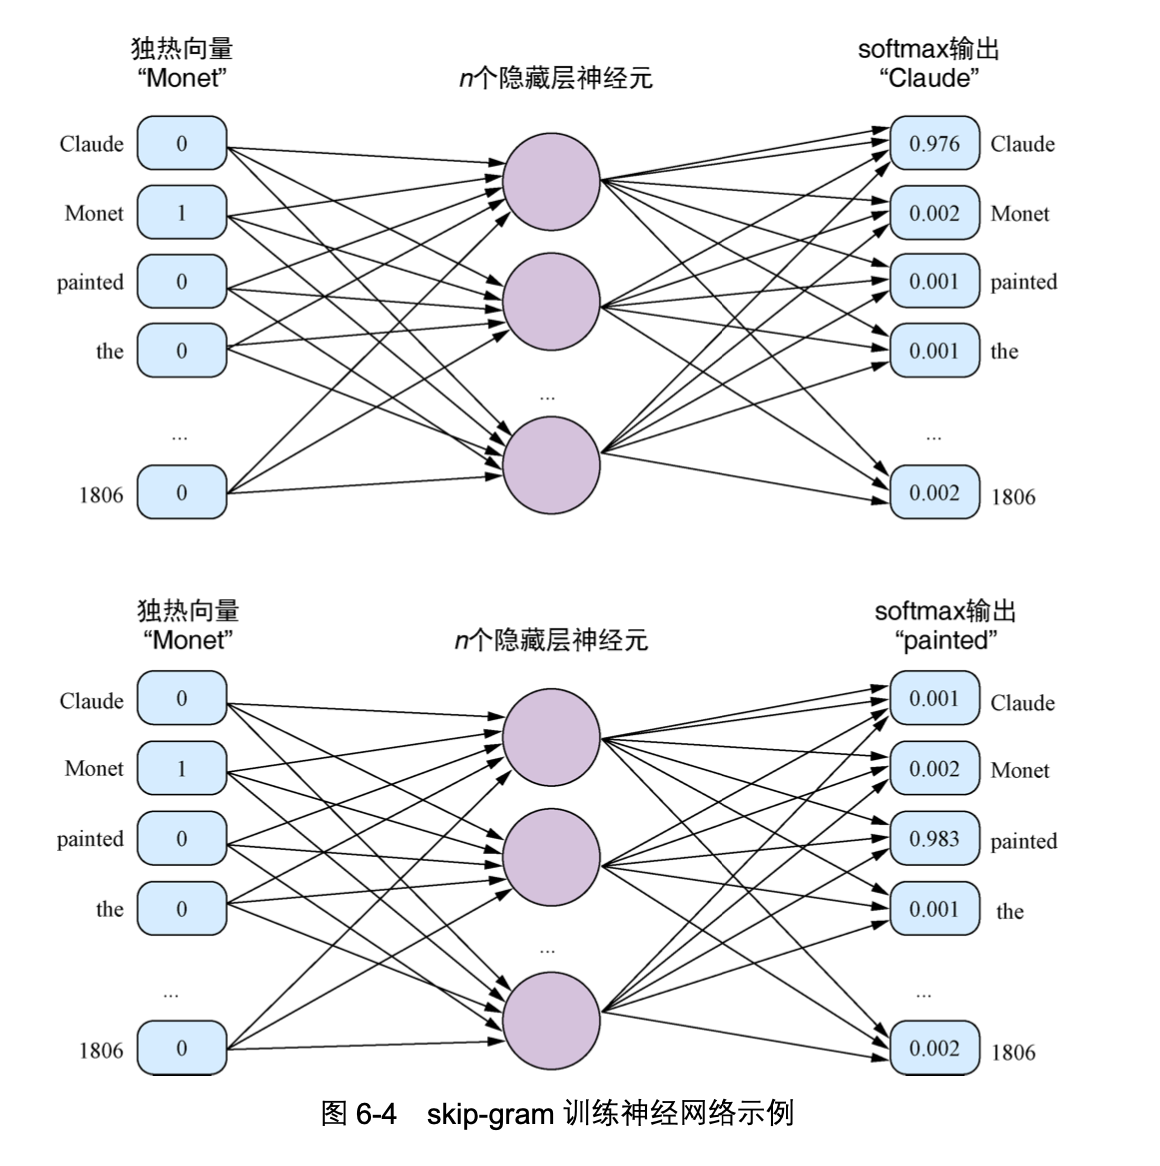

每个词在进入网络前被表示为一个独热向量。神经网络做词嵌入的输出向量也类 似于一个独热向量。通过输出层节点(输出层上每个节点对应于词汇表中的一个词条)的 softmax 激活函数来计算输出词是输入词的周围词的概率。然后将最大概率的词转换为 1，其余所有词转换 为 0，从而将输出词的概率向量转换为一个独热向量，这样处理可以简小损失函数的计算复杂度。

### CBOW

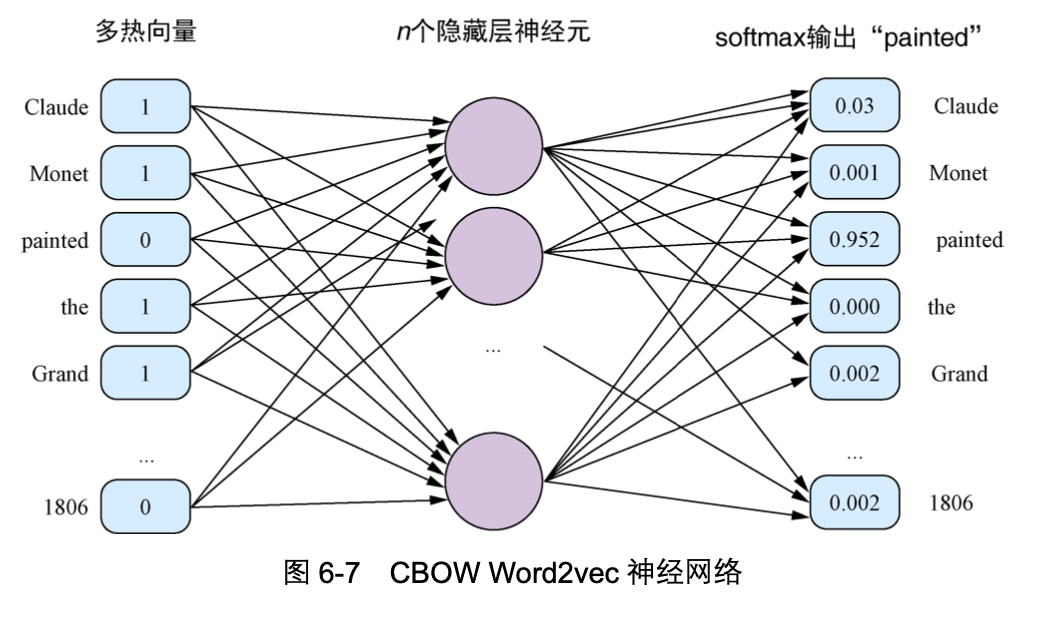

Mikolov 强调，skip-gram 方法对于小型语料库和一些罕见的词项比较适用。在 skip-gram 方 法中，由于网络结构的原因，将会产生更多的训练样本。但 CBOW 方法在常用词上有更高的精 确性，并且训练速度快很多。

### word2vec计算技巧

#### 高频 2-gram

有些词经常与其他词组合出现，例如“Elvis”通常后面跟“Presley”(这两个词分别是猫王的名字与姓氏)，从而构成一个 2-gram。

#### 高频词条降采样

另一个改进原算法性能的方法是高频词条降采样。像“the”或“a”这样的常用词通常不包含重要信息，语料库中“the”与许多名词都共现，因此并不会带来更多的含义，反而给 Word2vec 语义相似性表示带来一定的混淆。为了减少像停用词这样的高频词的影响，可以在训练过程中对词进行与其出现频率成反比的采样。

#### 负采样

Mikolov 提出的最后一个技巧是负采样。当一个训练样本(一对词)输入网络后，会引起网络中所 有权重的更新，这样会改变词汇表中所有词的向量值。如果词汇表规模达到十亿级，为一个大型的独热 向量更新所有权重将会变得极其低效。为了加快词向量模型的训练速度，Mikolov采用了负采样方法。

Mikolov 建议只在输出向量中选取少量的负样本进行权重更新，而不用去更新词窗口以外所有其他词的权重。选取 n 个负样本词对(目标输出词之外的词)，根据其对输出的贡献来更新对应的权重。通过这种方法，可以极大地减小计算量，而且对训练网络性能不会有明显影响。

### 一种无监督学习

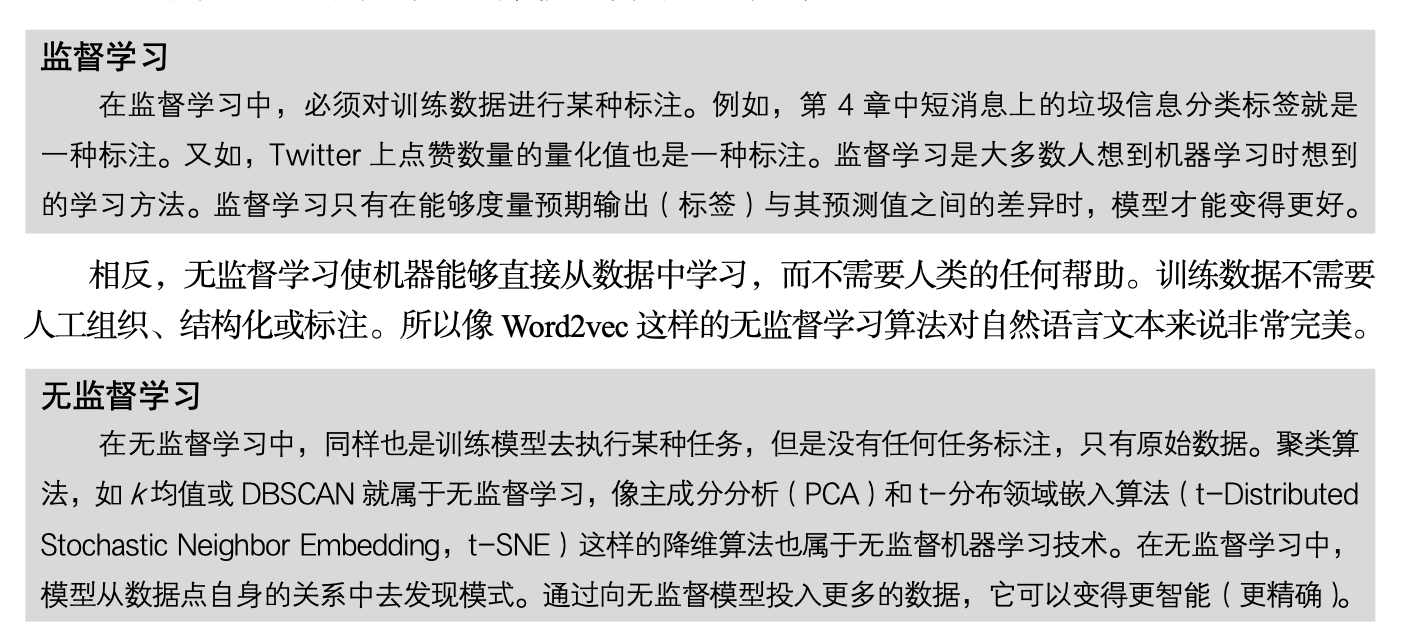

## 6.2.3 如何使用gensim.word2vec 模块

In [ ]:
from nlpia.data.loaders import get_data

In [2]:
from gensim.models.keyedvectors import KeyedVectors

In [3]:
word_vectors = KeyedVectors.load_word2vec_format('/Users/raye/Desktop/机器学习/NLP/GoogleNews-vectors-negative300.bin.gz',
        binary=True, limit=200000)

gensim.KeyedVectors.most_similar()方法提供了对于给定词向量，查找最近的相邻词的有效方法。关键字参数 positive 接受一个待求和的向量列表。同样，大家也可以用 negative参数来做减法，以排除不相关的词项。参数topn用于指定返回结果中相关词项的数量。

In [4]:
word_vectors.most_similar(positive=['cooking', 'potatoes'], topn=5)

[('cook', 0.6973530054092407),
 ('sweet_potatoes', 0.6600279808044434),
 ('vegetables', 0.6513739228248596),
 ('onions', 0.6512383222579956),
 ('baking', 0.6481683850288391)]

如果要比较两个词并确定它们的余弦相似度，可以使用.similarity()方法:

In [5]:
word_vectors.similarity('princess', 'queen')

0.7070532

如果大家想开发自己的函数并使用原始的词向量，那么可以在 KeyedVector 实例上通Python 的方括号语法([])或 get()方法来实现，这样将加载的模型对象视为一个字典，而目标词是字典中的一个键，返回结果是一个数组，数组中的每个浮点数表示向量的一个维度。在谷歌的词向量模型中，返回的 numpy 数组的形状为 1 × 300。

In [7]:
word_vectors['phone']

array([-0.01446533, -0.12792969, -0.11572266, -0.22167969, -0.07373047,
       -0.05981445, -0.10009766, -0.06884766,  0.14941406,  0.10107422,
       -0.03076172, -0.03271484, -0.03125   , -0.10791016,  0.12158203,
        0.16015625,  0.19335938,  0.0065918 , -0.15429688,  0.03710938,
        0.22753906,  0.1953125 ,  0.08300781,  0.03686523, -0.02148438,
        0.01483154, -0.21289062,  0.16015625,  0.29101562, -0.03149414,
       -0.05883789,  0.04418945, -0.11767578, -0.12597656,  0.08447266,
       -0.10791016, -0.11279297,  0.17871094,  0.04467773,  0.17675781,
       -0.17089844, -0.02160645, -0.00061417, -0.17480469, -0.04760742,
        0.06835938, -0.0546875 ,  0.04467773, -0.19628906, -0.18554688,
       -0.10839844, -0.06030273,  0.11474609,  0.08544922,  0.05859375,
        0.23925781, -0.07080078,  0.11816406, -0.11132812,  0.08300781,
       -0.04394531,  0.00970459, -0.1484375 ,  0.265625  , -0.13769531,
        0.23535156, -0.19824219,  0.31445312,  0.02734375,  0.16

In [57]:
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import LineSentence
import pandas as pd

In [61]:
c=LineSentence('/Users/raye/Desktop/机器学习/NLP/word2vec.txt')

In [66]:
model = Word2Vec(c,vector_size=100)

In [63]:
model_name = "0311_word2vec_model" 
model.save(model_name)

In [64]:
model = Word2Vec.load(model_name)

In [71]:
model.wv.most_similar('android')

[('app', 0.7433931827545166),
 ('框架', 0.7245219349861145),
 ('推荐', 0.6861638426780701),
 ('应用', 0.6746917366981506),
 ('目前', 0.6504740715026855),
 ('#####', 0.6458144187927246),
 ('google', 0.6422144770622253),
 ('部分', 0.6399815082550049),
 ('链接', 0.6383564472198486),
 ('二维码', 0.636709988117218)]

## 6.2.5  GloVe、fastText

### GloVe——寻找最优解

由 Jeffrey Pennington 领导的斯坦福大 学NLP 研究团队研究了 Word2vec 的工作原理，并从中找到可优化的代价函数。他们计算词的共现次数并记录在一个正方形矩阵中。他们发现可以对这个共现矩阵进行奇异值分解，分解得到的两个权重矩阵的意义与Word2vec 产生的完全相同。

关键点在于用同样的方法对共现矩阵进行归一化。在某些情况下，Word2vec 模型无法收敛，而斯坦福大学的研究人员能够通过他们提出的SVD方法得到全局最优解。这个方法是对词共现的全局向量(在整个语料库中的共现)直接 进行优化，因此命名为 GloVe(global vectors of word co-occurrences)。

尽管 Word2vec 首先普及了基于词向量进行语义推理的概念，不过大家还是应当尽量使用 GloVe 来训练新的词向量模型。通过 GloVe，大家更有可能找到词向量表示的全局最优解，从而得到更精确的结果。

GloVe 的优点如下:
􏰀 训练过程更快;
􏰀 更有效地利用 CPU、内存(可以处理更大规模的文档); 
􏰀 更有效地利用数据(对小型语料库有帮助);
􏰀 在相同训练次数的情况下精确率更高。

### fastText——字符的预测

Facebook 的研究人员将 Word2vec 的概念又向前推进了一步，在模型训练中加入了一个新花样。他们将新算法命名为 fastText，与Word2vec 中预测周围词不同，该算法预测周围的n个字符。

例如，“whisper”将生成以下两字符的 gram 和 3 字符的 gram:
wh, whi, hi, his, is, isp, sp, spe, pe, per, er

## 6.2.8 词关系可视化

### 随机查看一组词

In [83]:
vocab=pd.Series(word_vectors.key_to_index)
vocab.iloc[100000:100006]

distinctiveness    100000
Namco_Bandai       100001
ramparts           100002
Linden_Lab         100003
Revolutions        100004
Henderson_Nev.     100005
dtype: int64

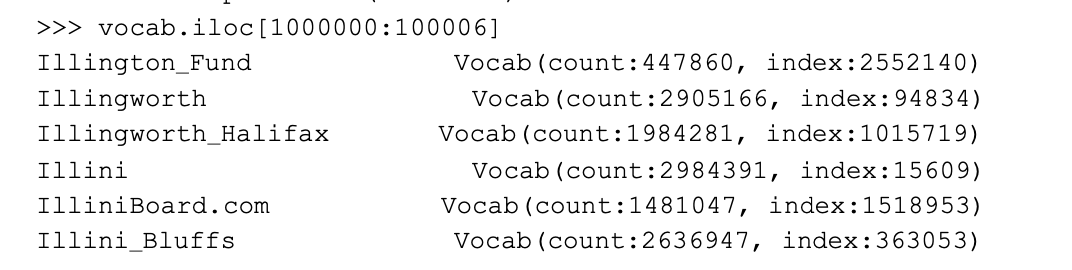

### 计算相似度

In [87]:
import numpy as np
wv=word_vectors
np.linalg.norm(wv['princess']-wv['prince'])

2.4925182

In [88]:
cos_similarity=np.dot(wv['princess'],wv['prince'])/(
    np.linalg.norm(wv['princess'])*np.linalg.norm(wv['prince']))
cos_similarity

0.69865096

In [89]:
1-cos_similarity

0.30134904384613037

In [90]:
#检验结果
wv.similarity('princess','prince')

0.698651

### 但这种相似度存在偏见!

In [119]:
wv.similarity('man','nurse')

0.2547229

In [120]:
wv.similarity('woman','nurse')

0.44135594

### 美国城市数据来实现可视化

In [109]:
cities = get_data('cities_us')
cities.head(1).T

,131484
geonameid,4295856
city,Indian Hills Cherokee Section
asciiname,Indian Hills Cherokee Section
alternatenames,"Cherokee,Indian Hills Cherokee Section"
latitude,38.27951
longitude,-85.64996
feature_class,P
feature_code,PPL
country_code,US
cc2,NaN


In [95]:
states=pd.read_csv(\
                   'http://www.fonz.net/blog/wp-content/uploads/2008/04/states.csv')

In [103]:
states

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming

In [97]:
#把dataframe转换成字典
states = dict(zip(states.Abbreviation, states.State))

In [112]:
us=cities
us['city']=us.city.copy()
us['st'] = us.admin1_code.copy()  
us['state'] = us.st.map(states)
us[['city','st','state']].head()

,city,st,state
131484,Indian Hills Cherokee Section,KY,Kentucky
137549,Agoura,CA,California
134468,Midway,TN,Tennessee
129252,Flint City,AL,Alabama
138038,Los Serranos,CA,California


现在，除了缩写，还为每个城市提供了一个完整的州名。

我们检查看看 Word2vec 词汇表中有哪些州名和城市名:

In [116]:
vocab=pd.np.concatenate([us.city, us.st, us.state])
vocab=np.array([word for word in vocab if word in wv])
vocab[:5]

/Users/raye/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


array(['Agoura', 'Midway', 'Plantation', 'Carville', 'Johnsonville'],
      dtype='<U15')

In [117]:
#通过州词向量增强的城市词向量
city_plus_state = []
for c, state, st in zip(us.city, us.state, us.st): 
    if c not in vocab:
        continue
    row=[]
    if state in vocab:
        row.extend(wv[c]+wv[state])
    else:
        row.extend(wv[c]+wv[st])
    city_plus_state.append(row)

In [125]:
us_300D = pd.DataFrame(city_plus_state)

#### 使用PCA将数据投影到2维图上

In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [127]:
#us_300D_2=get_data('/Users/raye/Desktop/机器学习/NLP/cities_us_wordvectors.csv.gz')
us_300D_2

,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,name
"Agoura, CA",-0.302979,0.397949,0.121094,0.094299,-0.329102,-0.155029,-0.258209,0.112183,-0.176270,0.251953,...,0.078125,0.511230,0.602295,-0.073242,-0.347900,-0.828125,0.183594,-0.296509,0.256653,"Agoura, CA"
"Midway, TN",0.491699,-0.008057,-0.141209,0.549072,-0.168823,-0.031250,-0.488159,0.125000,-0.665039,0.307617,...,0.509033,-0.611328,-0.126770,0.051270,-0.964844,-0.222733,-0.158691,-0.089466,0.297852,"Midway, TN"
"Los Serranos, CA",-0.189697,0.245850,0.526367,0.184998,-0.465332,-0.383789,-0.476318,-0.017212,0.019043,0.214355,...,-0.120361,0.417114,0.836914,0.254883,-0.266846,-0.458130,0.180176,-0.288513,0.132629,"Los Serranos, CA"
"Carville, LA",0.337402,0.293945,-0.372314,0.600586,-0.417969,0.232422,-0.867188,-0.368164,-0.072998,-0.157959,...,0.016113,0.164673,0.015869,0.060547,-0.056641,-0.000488,-0.695312,-0.387238,0.410522,"Carville, LA"
"Johnsonville, TN",0.179199,0.018311,-0.312108,0.642578,-0.165161,0.359375,-0.639526,-0.097656,-0.883789,0.344238,...,0.554932,-1.123047,-0.244446,-0.370117,-1.250000,-0.413086,0.010498,-0.176270,0.417480,"Johnsonville, TN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nevada, MO",0.654785,0.001465,0.336670,0.852539,-0.527832,-0.027588,-0.374756,-0.025879,0.099731,0.054932,...,0.879883,-0.308548,0.368164,0.367188,-0.676147,-0.181259,0.399414,-0.440552,0.649292,"Nevada, MO"
"Southern Pines, NC",0.343933,-1.038086,-0.327881,0.418945,0.034180,0.152710,-1.039062,-0.065430,-0.881836,0.075378,...,-0.019531,-0.935547,-0.073730,0.039551,-1.001953,-0.343506,0.237793,0.097656,0.102051,"Southern Pines, NC"
"Pratt, KS",0.124512,0.200989,-0.082397,0.342773,-0.560303,-0.358185,-0.347656,-0.064941,-0.038086,0.054565,...,0.594727,-0.104858,0.314941,0.076294,-0.657227,-0.581055,0.787109,-0.475098,0.105469,"Pratt, KS"
"Saint Joseph, MO",0.414062,0.251953,0.245850,0.966797,-0.039062,-0.226562,-0.321442,-0.077637,0.139282,0.344482,...,0.937500,-0.492142,-0.115234,0.159180,-0.633423,-0.176376,0.200806,-0.230103,1.031250,"Saint Joseph, MO"


In [130]:
us_2D = pca.fit_transform(us_300D_2.iloc[:, :300])

In [131]:
us_2D

array([[ 5.2494342 , -1.16877567],
       [-1.00205751,  1.84191455],
       [ 4.24605033, -0.96630405],
       ...,
       [-0.62444404, -0.07154512],
       [-1.88408072, -0.66052628],
       [-0.94087779, -1.32229035]])

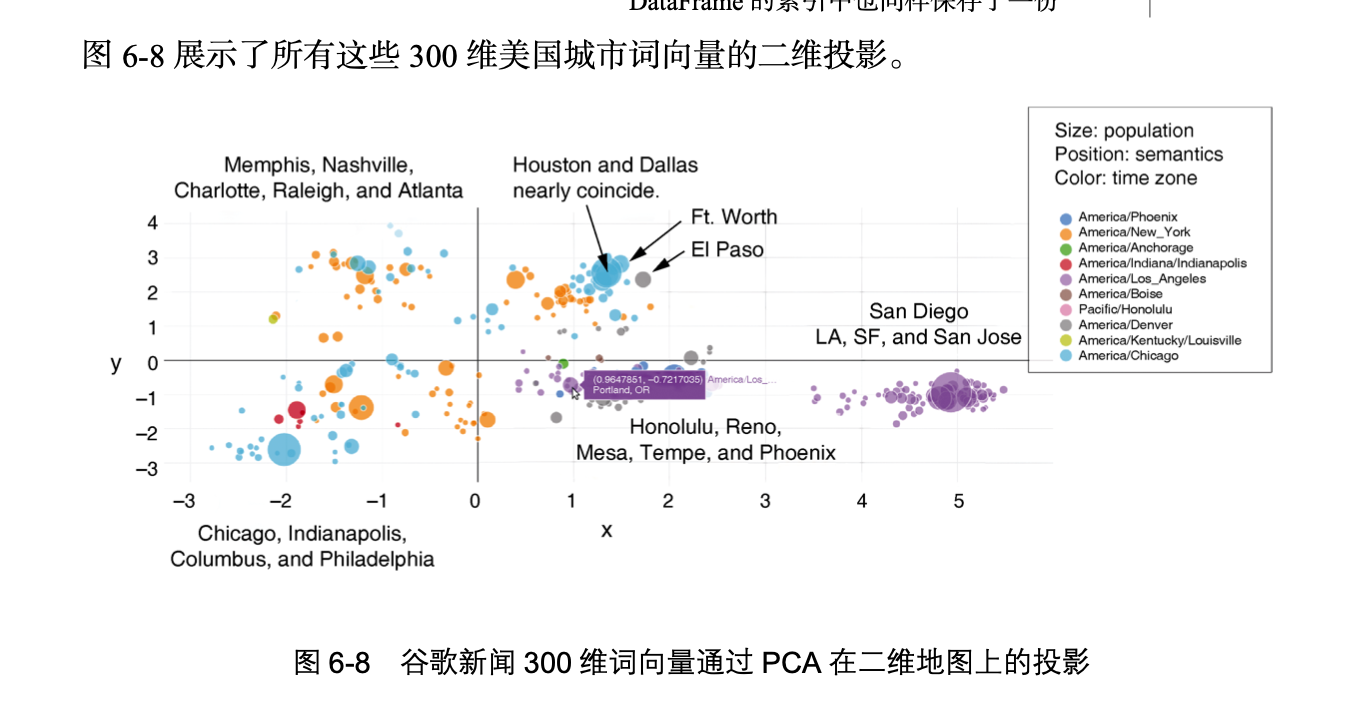

### 6.2.10 利用Doc2vec计算文档相似度

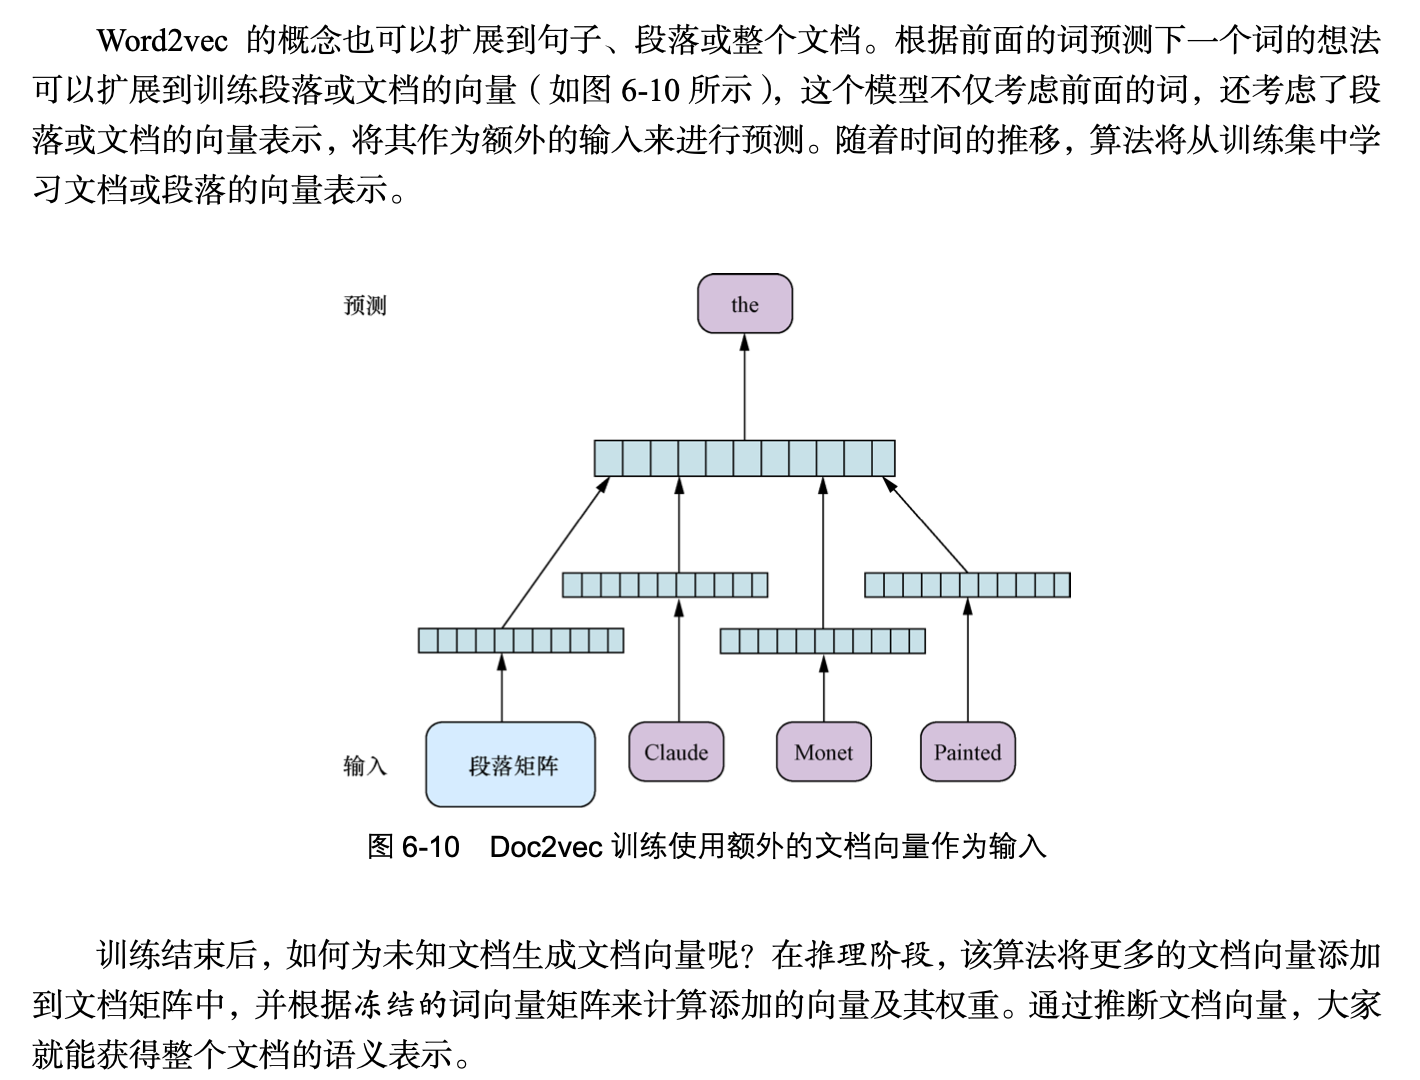

In [136]:
import multiprocessing
num_cores = multiprocessing.cpu_count()

In [139]:
#gensim Doc2vec 模块为语料库中的每篇文档包含了词向量嵌入和文档向量
#gensim 的 simple_preprocess 单元是一个粗分词器，会去除单字母词和所有标点符号，
#第2章中介绍的其他的分词器也都可以在这里使用
from gensim.models.doc2vec import TaggedDocument,Doc2Vec
from gensim.utils import simple_preprocess

In [146]:
corpus = ['This is the first document, I just randomly type down some words.',\
           'another document is a new one. what do you expect to find out?']
training_corpus = []

for i, text in enumerate(corpus):
    #gensim 提供了一个数据结构，支持用字符串或整数标签来表示文档的类别标签、
    #关键词或其他与文档关联的信息
    tagged_doc = TaggedDocument(simple_preprocess(text), [i])
    training_corpus.append(tagged_doc)

#实例化一个 Doc2vec 对象，滑动窗口大小为10个词，每个词和文档向量100维
#(比300维的谷歌新闻 Word2vec 向量小得多)。
#min_count 是词汇表中文档频率的最小值
model = Doc2Vec(vector_size=100, min_count=2, workers=num_cores, epochs=10)

#模型开始训练之前需 要对词汇表进行编译
model.build_vocab(training_corpus)

#10 个训练周期后结束训练
model.train(training_corpus, total_examples=model.corpus_count,
 epochs=model.epochs)

In [147]:
model.infer_vector(simple_preprocess(\
'This is a completely unseen document'), epochs=10)

array([ 0.0001812 , -0.00366854,  0.00022612, -0.00165267,  0.00050817,
        0.0011164 , -0.00196916, -0.00081122,  0.00046646, -0.00399143,
        0.00272858, -0.00111085, -0.00061088,  0.00371973,  0.00128845,
        0.00373059,  0.00341164,  0.00476862,  0.00075835, -0.00197779,
       -0.00456729, -0.00106391, -0.00329338,  0.00311945,  0.00118241,
       -0.00139074, -0.00185414, -0.00212505,  0.00396594, -0.00453424,
       -0.00476683, -0.00455046, -0.00096426, -0.00201446, -0.00164217,
       -0.00048789, -0.00378827, -0.00243825,  0.00072175, -0.00151014,
       -0.00193711,  0.00423396, -0.00396909, -0.00025075,  0.00491013,
        0.00199539,  0.00087518, -0.0026237 ,  0.00337493,  0.0005522 ,
        0.00229817,  0.00448814,  0.0019233 ,  0.00241093, -0.0049521 ,
       -0.00313132, -0.00028217, -0.00401849,  0.00176616,  0.00214123,
       -0.00475079,  0.0011213 , -0.00330201, -0.00041248, -0.00059065,
       -0.00312973,  0.00440543,  0.000993  ,  0.00275196,  0.00